In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
data=pd.read_csv('..\\..\\dataPreprocessing\\k_movie_2.csv')
data

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [4]:
#서울은 국내 가장 큰 도시이므로 서울관람객이 많은 영화가 흥행할 것이다
data=data.dropna(subset=['VIEWNG_NMPR_CO', 'SEOUL_VIEWNG_NMPR_CO'])
data

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [5]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


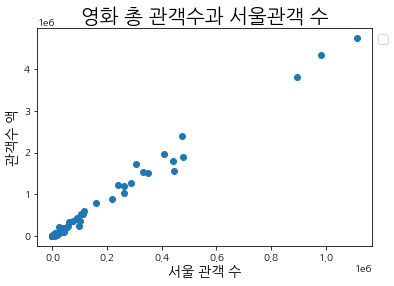

1.0
1113402.0


In [6]:
#유통회사 수에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data['SEOUL_VIEWNG_NMPR_CO'],
        data['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 총 관객수과 서울관객 수', fontsize=20)
plt.xlabel('서울 관객 수', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

print(min(data['SEOUL_VIEWNG_NMPR_CO']))
print(max(data['SEOUL_VIEWNG_NMPR_CO']))

In [7]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(data['VIEWNG_NMPR_CO']))
print(shapiro(data['SEOUL_VIEWNG_NMPR_CO']))

#등분산성 - 등분산성을 따르지 않음
print(levene(data['VIEWNG_NMPR_CO'], data['SEOUL_VIEWNG_NMPR_CO'], center='median'))

ShapiroResult(statistic=0.24783772230148315, pvalue=1.4893745883518033e-35)
ShapiroResult(statistic=0.2503848671913147, pvalue=1.6461304621523942e-35)
LeveneResult(statistic=10.980541255995671, pvalue=0.0009671906970601682)


In [8]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음
print(stats.spearmanr(data['VIEWNG_NMPR_CO'],data['SEOUL_VIEWNG_NMPR_CO']))

SpearmanrResult(correlation=0.9700524956513412, pvalue=7.051481051520586e-221)


In [9]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ SEOUL_VIEWNG_NMPR_CO',data=data).fit() ## 단순선형회귀모형 적합
fit.summary() #90% 자료를 설명할 수 있음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.418e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:14:50   Log-Likelihood:                -4336.3
No. Observations:                 358   AIC:                             8677.
Df Residuals:                     356   BIC:                             8684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1960.8428   2402.158     -0.816      0.415   -6685.046    2763.361
SEOUL_VIEWNG_NMPR_CO     4.3583      0.021    210.186      0.000       4.318       4.399
==============================================================================
Omnibus:                      233.536   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26368.478
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                      44.896   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
## 변수의 선언
x = data['SEOUL_VIEWNG_NMPR_CO']
y = data['VIEWNG_NMPR_CO']

## 모델의 선언
seoulViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
seoulViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '10000명의 서울 관객수일때 총 관람 인원 예측 :{}'.format(seoulViewer_linearRegression.predict([[10000]])[0])
    , 'X변수 계수: {}'.format(seoulViewer_linearRegression.coef_[0])
    , sep = '\n')

10000명의 서울 관객수일때 총 관람 인원 예측 :41622.4675954193
X변수 계수: 4.358331035369529


In [11]:
#기울기
print(seoulViewer_linearRegression.coef_)

#절편
print(seoulViewer_linearRegression.intercept_)

[4.35833104]
-1960.8427582759905


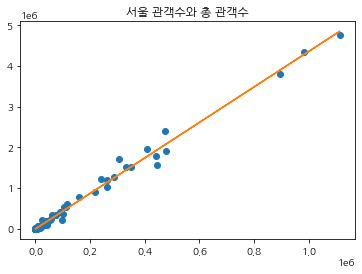

In [12]:
plt.plot(x, y, 'o')
plt.plot(x,seoulViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.title("서울 관객수와 총 관객수")
plt.show()

In [13]:
data

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


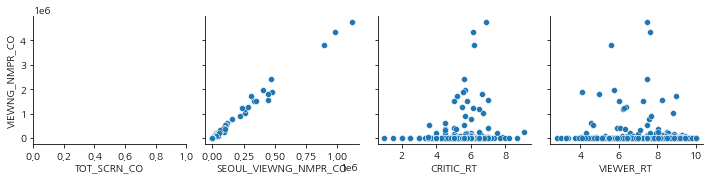

In [17]:
import seaborn as sns
sns.pairplot(data, x_vars=['TOT_SCRN_CO','SEOUL_VIEWNG_NMPR_CO','CRITIC_RT','VIEWER_RT'], y_vars='VIEWNG_NMPR_CO')
plt.show()